In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [12]:
# Loading the csv file of train 
df = pd.read_csv( 'train.csv') 

In [13]:
# handle missing values by showing the sum of them 
missing_values = df.isnull().sum()
# printing the sum of null values 
print (missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [14]:
#to fill those null values, I use median 
df['Age'] = df['Age'].fillna(df['Age'].median())

# Creating a new column 'Has_Cabin'
df['Has_Cabin'] = df['Cabin'].notnull().astype(int)
# Fill missing values for Cabin with a placeholder (Unknown Value)
df['Cabin'] = df['Cabin'].fillna('Unknown Value')


# Embarked has 2 missing values which we can be filled by the mode or backfill. 
# I prefer mode for filling the missing values in Embarked.
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [15]:
# to ensure that missing values are handled 
missing_values_after = df.isnull().sum()
#printing those columns which include missing values.
print(missing_values_after[missing_values_after > 0])

Series([], dtype: int64)


In [16]:
female_passengers = df[df['Sex'] == 'female']
print(female_passengers)

     PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
..           ...       ...     ...   
880          881         1       2   
882          883         0       3   
885          886         0       3   
887          888         1       1   
888          889         0       3   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
..                                                 ...     ...   ... 

In [17]:
# 2. Filter for passengers older than 20
older_passengers = df[df['Age'] > 20]
print(older_passengers.sum())

PassengerId                                               318331
Survived                                                     260
Pclass                                                      1597
Name           Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
Sex            malefemalefemalefemalemalemalemalefemalefemale...
Age                                                      23896.5
SibSp                                                        280
Parch                                                        204
Ticket         A/5 21171PC 17599STON/O2. 31012821138033734503...
Fare                                                  23350.2491
Cabin          Unknown ValueC85Unknown ValueC123Unknown Value...
Embarked       SCSSSQSSSSSSSCSSSSCQSCCQSCSCSSSCSQQCSCSCSSCCSS...
Has_Cabin                                                    175
dtype: object


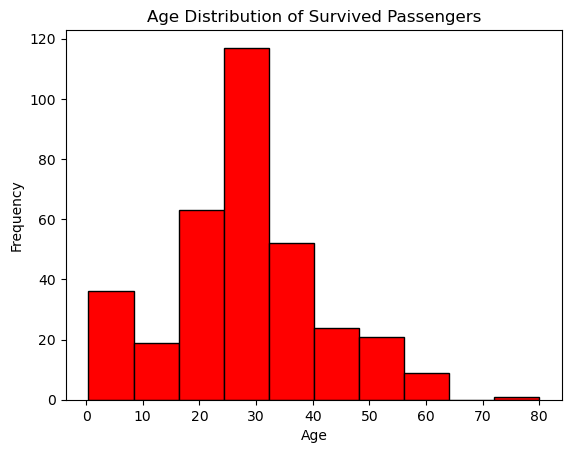

In [19]:
import matplotlib.pyplot as plt
# Creating a histogram for age distribution of survived passengers
survived_ages = df[df['Survived']==1]['Age'].dropna()
survived_ages.plot(kind='hist', color = 'red', edgecolor = 'black')
# Adding titles and labels
plt.title('Age Distribution of Survived Passengers')
plt.xlabel('Age') 
plt.ylabel('Frequency') 
plt.show()

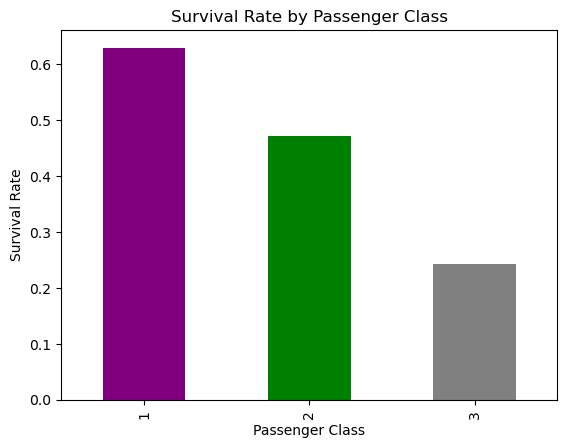

In [21]:
# this time i like to use a bar chart to show the rate of survival.
survival_rate = df.groupby('Pclass')['Survived'].mean()

# Features for plotting
survival_rate.plot(kind='bar', color=['purple', 'green', 'gray'])
plt.title('Survival Rate by Passenger Class') 
plt.xlabel('Passenger Class') 
plt.ylabel('Survival Rate') 
plt.show() 